<a href="https://colab.research.google.com/github/Hrituja/Vector-Space-Based-Information-Retrieval/blob/master/IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Information Retrieval**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving wiki_99 to wiki_99


### **Imports**

In [0]:
import re
import math
import string
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

import matplotlib.pyplot as plt

# Preprocess file
data = open("wiki_99","r")

# Substitute all html tags with ''

file = open("wiki_99", 'r')
text = file.read().strip()
file.close()
file_name = re.findall(' id="(.*)" url', text)
file_body = re.findall('<doc .*>((.|\n)*?)<\/doc>',text)

data_cleaned={}
for j in range(len(file_name)):
    filebody=re.sub('<[^>]*>', '', str(file_body[j]))
    if(len(data_cleaned)==0):
        data_cleaned.update({'label':[str(file_name[j])],'body_text':[filebody]})
    else:
        data_cleaned['label'].append(str(file_name[j]))
        data_cleaned['body_text'].append(filebody)
    

data = pd.DataFrame.from_dict(data_cleaned)



def clean_text(text):
    tokens = word_tokenize(text)
    return text

data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleaned_text
0,167857,('\nThe Usual Suspects\n\nThe Usual Suspects i...,('\nThe Usual Suspects\n\nThe Usual Suspects i...
1,167858,('\nIndependent Irish Party\n\nThe Independent...,('\nIndependent Irish Party\n\nThe Independent...
2,167859,"('\nJohn Russell, 1st Earl Russell\n\nJohn Rus...","('\nJohn Russell, 1st Earl Russell\n\nJohn Rus..."
3,167861,('\nDecebalus\n\nDecebalus (r. 87–106) was the...,('\nDecebalus\n\nDecebalus (r. 87–106) was the...
4,167866,('\nWilhelm Steinitz\n\nWilhelm (later William...,('\nWilhelm Steinitz\n\nWilhelm (later William...


In [0]:
!pip install nltk

### **Part 1: Corpus Analysis**

**Unigram Inverted Index:**
To overcome the problems of Term Documenting, we use a technique called unigram inverted index.
in this technique we store all the list of documents that contain a word. The collection of these lists for every word is called postings list.
The words that we use here are called dictionary. And each of the document list for a word is called postings.

#### Q1. Unigram analysis:

(840, 62252)


<Figure size 3600x2160 with 0 Axes>

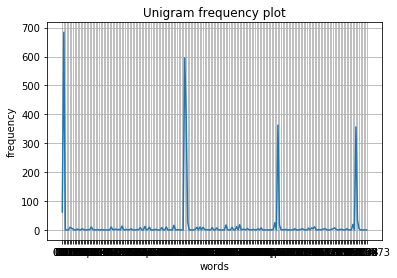

In [0]:
ngram_vect_unigram = CountVectorizer(ngram_range=(1,1))
X_counts_unigram = ngram_vect_unigram.fit_transform(data['body_text'])
print(X_counts_unigram.shape)
words_list=(ngram_vect_unigram.get_feature_names())
count_list=(X_counts_unigram.toarray().sum(axis=0))

np.random.seed(19680801)

plt.rcdefaults()
# Example data
# people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
# y_pos = np.arange(len(people))
# performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(words_list))

ax.barh(count_list, word_list, xerr=error, align='center')
ax.set_yticks(word_lis)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')





fig = plt.figure(figsize=(50, 30)) 
fig, ax = plt.subplots()
ax.plot(words_list[0:200], count_list[0:200])

ax.set(xlabel='words', ylabel='frequency',
       title='Unigram frequency plot')
ax.grid()

plt.show()

### **Bigram analysis**
**Bigrams:** Bigram is 2 consecutive words in a sentence.

(840, 605390)


<Figure size 3600x2160 with 0 Axes>

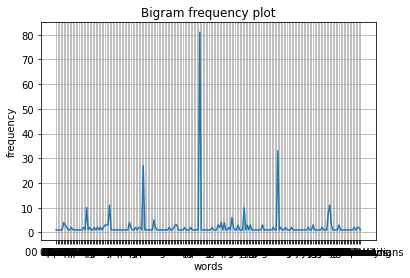

In [0]:
ngram_vect_bigram = CountVectorizer(ngram_range=(2,2))
X_counts_bigram = ngram_vect_bigram.fit_transform(data['body_text'])
words_list=(ngram_vect_bigram.get_feature_names())
print(X_counts_bigram.shape)
count_list=(X_counts_bigram.toarray().sum(axis=0))


fig = plt.figure(figsize=(50, 30)) 
fig, ax = plt.subplots()
ax.plot(words_list[0:200], count_list[0:200])

ax.set(xlabel='words', ylabel='frequency',
       title='Bigram frequency plot')
ax.grid()

plt.show()

### **Q2. Trigram analysis:**
**Trigrams:** Trigram is 3 consecutive words in a sentence. 

(840, 1090889)


<Figure size 3600x2160 with 0 Axes>

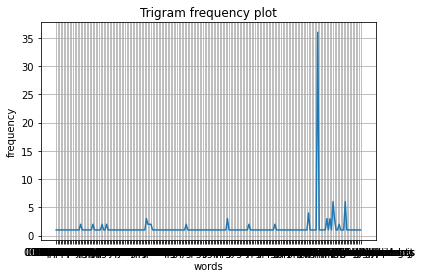

In [0]:
ngram_vect_trigram = CountVectorizer(ngram_range=(3,3))
X_counts_trigram = ngram_vect_trigram.fit_transform(data['body_text'])
print(X_counts_trigram.shape)
words_list=(ngram_vect_trigram.get_feature_names())
count_list=(X_counts_trigram.toarray().sum(axis=0))


fig = plt.figure(figsize=(50, 30)) 
fig, ax = plt.subplots()
ax.plot(words_list[0:200], count_list[0:200])

ax.set(xlabel='words', ylabel='frequency',
       title='Trigram frequency plot')
ax.grid()

plt.show()

###**Q4. Repeat Q1, Q2, and Q3 after performing the stemming process on the tokens.**

In [0]:
ps = nltk.PorterStemmer()
def stem_text(text):
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens])
    return text

data['body_stemmed'] = data['body_text'].apply(lambda x: stem_text(x))
data.head()

,label,body_text,cleaned_text,body_stemmed
0,167857,('\nThe Usual Suspects\n\nThe Usual Suspects i...,('\nThe Usual Suspects\n\nThe Usual Suspects i...,( '\nthe usual suspects\n\nth usual suspect is...
1,167858,('\nIndependent Irish Party\n\nThe Independent...,('\nIndependent Irish Party\n\nThe Independent...,( '\nindepend irish party\n\nth independ irish...
2,167859,"('\nJohn Russell, 1st Earl Russell\n\nJohn Rus...","('\nJohn Russell, 1st Earl Russell\n\nJohn Rus...","( '\njohn russel , 1st earl russell\n\njohn ru..."
3,167861,('\nDecebalus\n\nDecebalus (r. 87–106) was the...,('\nDecebalus\n\nDecebalus (r. 87–106) was the...,( '\ndecebalus\n\ndecebalu ( r. 87–106 ) wa th...
4,167866,('\nWilhelm Steinitz\n\nWilhelm (later William...,('\nWilhelm Steinitz\n\nWilhelm (later William...,( '\nwilhelm steinitz\n\nwilhelm ( later willi...


(840, 51457)


<Figure size 14400x8640 with 0 Axes>

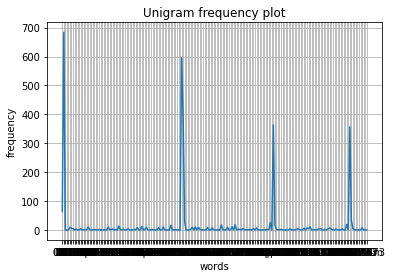

In [0]:
ngram_vect_unigram = CountVectorizer(ngram_range=(1,1))
X_counts_unigram = ngram_vect_unigram.fit_transform(data['body_stemmed'])
print(X_counts_unigram.shape)
words_list=(ngram_vect_unigram.get_feature_names())
count_list=(X_counts_unigram.toarray().sum(axis=0))


fig = plt.figure(figsize=(200, 120)) 
fig, ax = plt.subplots()
ax.plot(words_list[0:200], count_list[0:200])

ax.set(xlabel='words', ylabel='frequency',
       title='Unigram frequency plot')
ax.grid() 

plt.show()

(840, 557229)


<Figure size 3600x2160 with 0 Axes>

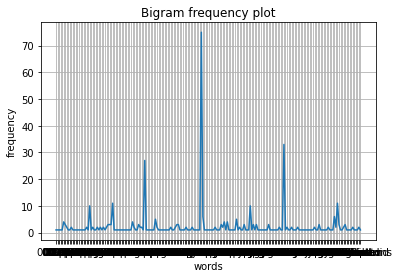

In [0]:
ngram_vect_bigram = CountVectorizer(ngram_range=(2,2))
X_counts_bigram = ngram_vect_bigram.fit_transform(data['body_stemmed'])
words_list=(ngram_vect_bigram.get_feature_names())
print(X_counts_bigram.shape)
count_list=(X_counts_bigram.toarray().sum(axis=0))

fig = plt.figure(figsize=(50, 30)) 
fig, ax = plt.subplots()
ax.plot(words_list[0:200], count_list[0:200])

ax.set(xlabel='words', ylabel='frequency',
       title='Bigram frequency plot')
ax.grid()

plt.show()

(840, 1073567)


<Figure size 3600x2160 with 0 Axes>

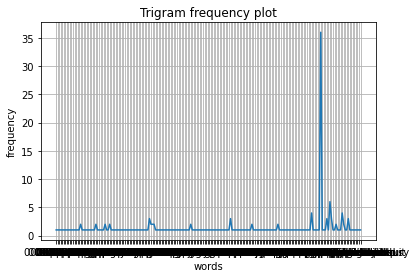

In [0]:
ngram_vect_trigram = CountVectorizer(ngram_range=(3,3))
X_counts_trigram = ngram_vect_trigram.fit_transform(data['body_stemmed'])
print(X_counts_trigram.shape)
words_list=(ngram_vect_trigram.get_feature_names())
count_list=(X_counts_trigram.toarray().sum(axis=0))
 
fig = plt.figure(figsize=(50, 30)) 
fig, ax = plt.subplots()
ax.plot(words_list[0:200], count_list[0:200])

ax.set(xlabel='words', ylabel='frequency',
       title='Trigram frequency plot')
ax.grid()

plt.show()

## **Part2: Vector-space based IR System**

In [0]:
dataset = []
import os

file = open("wiki_99","r")
text = file.read().strip()
file.close()
file_name = re.findall(' id="(.*)" url', text)
file_body = re.findall('<doc .*>((.|\n)*?)<\/doc>',text)

data=[]
for j in range(len(file_name)):
  filebody=re.sub('<[^>]*>', '', str(file_body[j]))
  data.append((file_name[j],filebody))
    
len(data)


840

### **Preprocessing**

In [0]:
import os
file = open("wiki_99","r")
text = file.read().strip()
file.close()
file_id = re.findall(' id="(.*)" url', text)
file_body = re.findall('<doc .*>((.|\n)*?)<\/doc>',text)

data=[]
for j in range(len(file_id)):
    filebody=re.sub('<[^>]*>', '', str(file_body[j]))
    data.append((file_id[j],filebody))

N = len(data)

In [0]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [0]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [0]:
def convert_lower_case(data):
    return np.char.lower(data)

In [0]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [0]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [0]:
def stemming(data):
    stemmer= nltk.PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [0]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) 
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) 
    data = remove_punctuation(data) 
    data = remove_stop_words(data)
    return data


### **Extracting data from preprocessed text**

In [0]:
processed_text = []
processed_id = []

for file in data[:N]:
    processed_id.append(word_tokenize(str(preprocess(file[0]))))
    processed_text.append(word_tokenize(str(preprocess(file[1]))))
    

N=len(processed_id)

#create DF dictionary which stores {token, documents in which it appears}
DF = {}
for i in range(len(processed_id)):
    tokens = processed_text[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}

for i in DF:
    DF[i] = len(DF[i])

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### **Calculating DF for all words**

In [0]:
total_vocab_size = len(DF)
print(total_vocab_size)

47624


In [0]:
total_vocab_size
total_vocab = [x for x in DF]

print(total_vocab[:20])
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

['nthe', 'usual', 'suspect', '1995', 'american', 'neo', 'noir', 'mysteri', 'crime', 'thriller', 'film', 'direct', 'bryan', 'singer', 'written', 'christoph', 'mcquarri', 'star', 'stephen', 'baldwin']


In [0]:
# TF-IDF for file text
doc = 0

tf_idf = {}
tf_doc = {}
for i in range(N):
    
    tokens = processed_text[i]
    
    counter = Counter(tokens + processed_id[i])
    words_count = len(tokens + processed_id[i])
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log((N+1)/(df+1))
        
        tf_doc[doc, token] = 1+math.log(tf,10)
        tf_idf[doc, token] = tf*idf

    doc += 1

### **Cosine Similarity**

In [0]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

In [0]:
# Vectorize tf-idf
# D consists of tf for document to calculate the IncItc ranking
D = np.zeros((N, total_vocab_size))
for i in tf_idf:
    try:
        ind = total_vocab.index(i[1])
        D[i[0]][ind] = tf_doc[i]
    except:
        pass

In [0]:
# generate query vector
def gen_vector(tokens):

    Q = np.zeros((len(total_vocab)))
    
    counter = Counter(tokens)
    words_count = len(tokens)

    query_weights = {}
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = math.log((N+1)/(df+1),10)

        try:
            ind = total_vocab.index(token)
            Q[ind] = 1+math.raw(tf,10)*idf
        except:
            pass
    return Q

In [0]:
def score(k, query):
    print("Cosine Similarity")
    preprocessed_query = preprocess(query)
    tokens = word_tokenize(str(query))
    
    print("\nQuery:", query)
    print("")
    print(tokens)
    
    d_cosines = []
    
    query_vector = gen_vector(tokens)
    
    for d in D:
        d_cosines.append(cosine_sim(query_vector, d))
        
    out = np.array(d_cosines).argsort()[-k:][::-1]
    
    print(len(processed_id))
    doc_id = [processed_id[doc] for doc in out ]
    print("")
    
    print(doc_id)


In [0]:
Q = score(10, "The rapid rise of Laestadianism among the Sami was due to several factors.")

Cosine Similarity

Query: The rapid rise of Laestadianism among the Sami was due to several factors.

['The', 'rapid', 'rise', 'of', 'Laestadianism', 'among', 'the', 'Sami', 'was', 'due', 'to', 'several', 'factors', '.']
840

[['170157'], ['168507'], ['168571'], ['168570'], ['168568'], ['168565'], ['168562'], ['168561'], ['168559'], ['168556']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [0]:
Q = score(10, "Anarchism is a political philosophy that advocates self-governed societies based on voluntary institutions. ")

Cosine Similarity

Query: Anarchism is a political philosophy that advocates self-governed societies based on voluntary institutions. 

['Anarchism', 'is', 'a', 'political', 'philosophy', 'that', 'advocates', 'self-governed', 'societies', 'based', 'on', 'voluntary', 'institutions', '.']
840

[['170157'], ['168507'], ['168571'], ['168570'], ['168568'], ['168565'], ['168562'], ['168561'], ['168559'], ['168556']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [0]:
Q = score(10, "Originally intended to be a Melatonin Magik remix album, as more and more guests were invited to feature, Canibus decided to also record new material for the album, and it quickly evolved into an official solo album. ")

Cosine Similarity

Query: Originally intended to be a Melatonin Magik remix album, as more and more guests were invited to feature, Canibus decided to also record new material for the album, and it quickly evolved into an official solo album. 

['Originally', 'intended', 'to', 'be', 'a', 'Melatonin', 'Magik', 'remix', 'album', ',', 'as', 'more', 'and', 'more', 'guests', 'were', 'invited', 'to', 'feature', ',', 'Canibus', 'decided', 'to', 'also', 'record', 'new', 'material', 'for', 'the', 'album', ',', 'and', 'it', 'quickly', 'evolved', 'into', 'an', 'official', 'solo', 'album', '.']
840

[['170157'], ['168507'], ['168571'], ['168570'], ['168568'], ['168565'], ['168562'], ['168561'], ['168559'], ['168556']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [0]:
Q = score(10, "In 1882, while Steinitz was playing in Vienna and sending weekly reports on the tournament to The Field, there was a plot against him back in England. ")

Cosine Similarity

Query: In 1882, while Steinitz was playing in Vienna and sending weekly reports on the tournament to The Field, there was a plot against him back in England. 

['In', '1882', ',', 'while', 'Steinitz', 'was', 'playing', 'in', 'Vienna', 'and', 'sending', 'weekly', 'reports', 'on', 'the', 'tournament', 'to', 'The', 'Field', ',', 'there', 'was', 'a', 'plot', 'against', 'him', 'back', 'in', 'England', '.']
840

[['170157'], ['168507'], ['168571'], ['168570'], ['168568'], ['168565'], ['168562'], ['168561'], ['168559'], ['168556']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [0]:
Q = score(10, "In May 1944 Iranian Airways was founded at the initiative of business leader and politician Reza Afshar, in partnership with Gholam Hossein Ebtehaj. Not long after its formation, Afshar, who had previously formed Iran Tour, the first Iranian travel and tour agency, and Mehrabad Airport, became the sole owner of the private company.")

Cosine Similarity

Query: In May 1944 Iranian Airways was founded at the initiative of business leader and politician Reza Afshar, in partnership with Gholam Hossein Ebtehaj. Not long after its formation, Afshar, who had previously formed Iran Tour, the first Iranian travel and tour agency, and Mehrabad Airport, became the sole owner of the private company.

['In', 'May', '1944', 'Iranian', 'Airways', 'was', 'founded', 'at', 'the', 'initiative', 'of', 'business', 'leader', 'and', 'politician', 'Reza', 'Afshar', ',', 'in', 'partnership', 'with', 'Gholam', 'Hossein', 'Ebtehaj', '.', 'Not', 'long', 'after', 'its', 'formation', ',', 'Afshar', ',', 'who', 'had', 'previously', 'formed', 'Iran', 'Tour', ',', 'the', 'first', 'Iranian', 'travel', 'and', 'tour', 'agency', ',', 'and', 'Mehrabad', 'Airport', ',', 'became', 'the', 'sole', 'owner', 'of', 'the', 'private', 'company', '.']
840

[['170157'], ['168507'], ['168571'], ['168570'], ['168568'], ['168565'], ['168562'], ['168561'], ['168559'],

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
